# Set up

In [1]:
# update path with data dir
import sys
sys.path.append('../data/')
sys.path.append('../modelling/')

In [29]:
import player_data as player
import goodness_fit
import pandas as pd
from datetime import datetime
import statsmodels.api as sm
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import beta

# Get data

In [3]:
file_name = 'csvs/element_gameweek_' + datetime.today().strftime('%Y-%m-%d') + '.csv'

In [4]:
try:
    element_gameweek_df = pd.read_csv(file_name)
except:
    element_gameweek_df = player.get_element_gameweek_df()
    element_gameweek_df.to_csv(file_name)

In [5]:
current_event = 30
element_types = [1, 2, 3, 4]
threshold_minutes = 0

In [6]:
element_gameweek_df =\
element_gameweek_df[
    (element_gameweek_df['event'] <= current_event)
    & (element_gameweek_df['element_type'].isin(element_types))
    & (element_gameweek_df['minutes'] >= threshold_minutes)
]

In [21]:
element_gameweek_df['minutes_p'] = element_gameweek_df['minutes']/90

# Analysis

In [16]:
def calculate_beta_parameters(mean, std):
    a = (mean**2 - mean**3 - std**2*mean)/std**2
    b = (mean*(1-mean**2 - std**2*(1 - mean)))/std**2
    return a, b

In [22]:
element_gameweek_df['minutes_p'].describe()

count    16823.000000
mean         0.389389
std          0.456748
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          1.000000
Name: minutes_p, dtype: float64

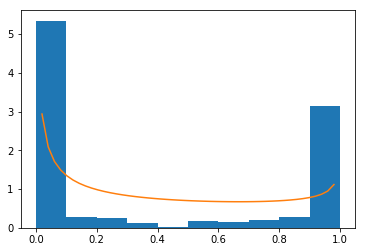

0.05440127584501964 1.3457343416253942


In [51]:
plt.figure()
plt.hist(element_gameweek_df['minutes_p'], density=True)
a, b = calculate_beta_parameters(element_gameweek_df['minutes_p'].mean(), element_gameweek_df['minutes_p'].std())
plt.plot(
    np.linspace(0.0, 1.0),
    beta.pdf(np.linspace(0.0, 1.0), 0.5, 0.75),
)
plt.show()
print(a, b)

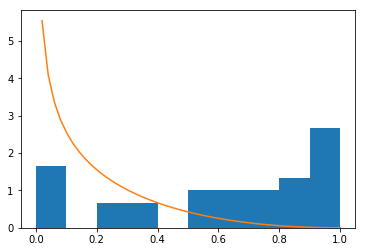

In [42]:
plt.figure()
plt.hist(element_gameweek_df[element_gameweek_df['element']==225]['minutes_p'], density=True)
a, b = calculate_beta_parameters(
    element_gameweek_df[element_gameweek_df['element']==225]['minutes_p'].mean(),
    element_gameweek_df[element_gameweek_df['element']==225]['minutes_p'].std())
plt.plot(
    np.linspace(0.0, 1.0),
    beta.pdf(np.linspace(0.0, 1.0), a, b),
)

plt.show()

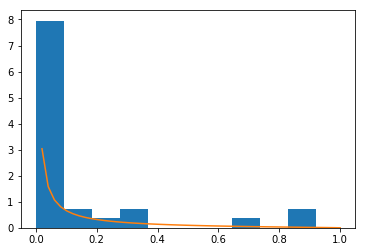

In [43]:
plt.figure()
plt.hist(element_gameweek_df[element_gameweek_df['element']==105]['minutes_p'], density=True)
a, b = calculate_beta_parameters(
    element_gameweek_df[element_gameweek_df['element']==105]['minutes_p'].mean(),
    element_gameweek_df[element_gameweek_df['element']==105]['minutes_p'].std())
plt.plot(
    np.linspace(0.0, 1.0),
    beta.pdf(np.linspace(0.0, 1.0), a, b),
)

plt.show()